# Comparison of Numerical Integration Methods

/var/folders/7h/m_gp7w0x1955xv6xvcndpkf40000gn/T/ipykernel_5348/4264381880.py:32: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  spline_simpson = simps(y_spline, x_spline)


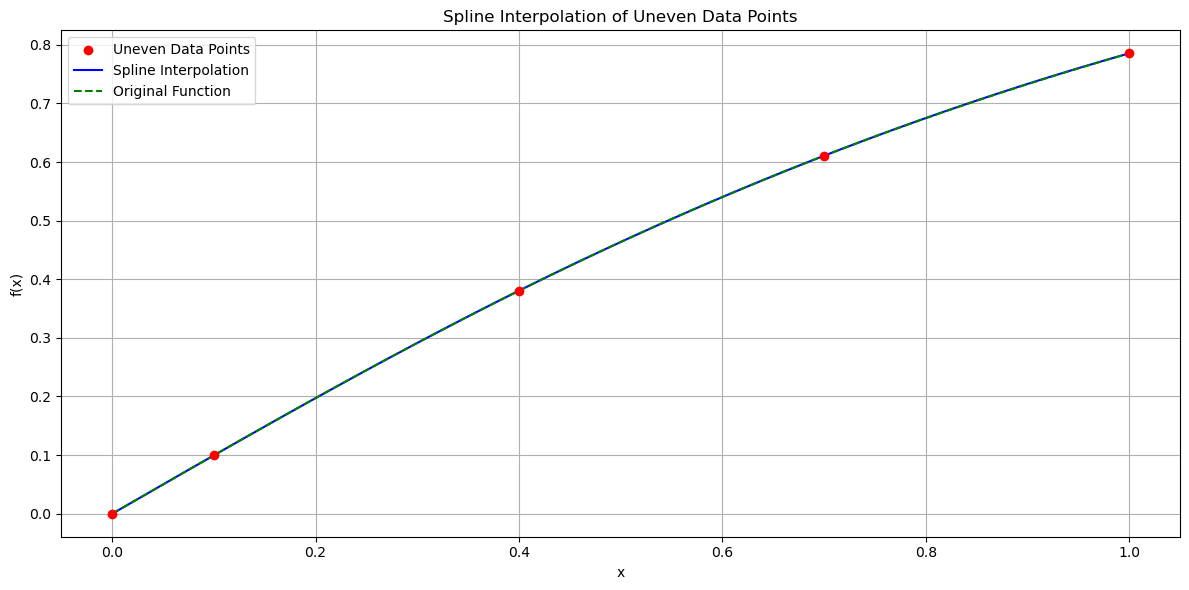

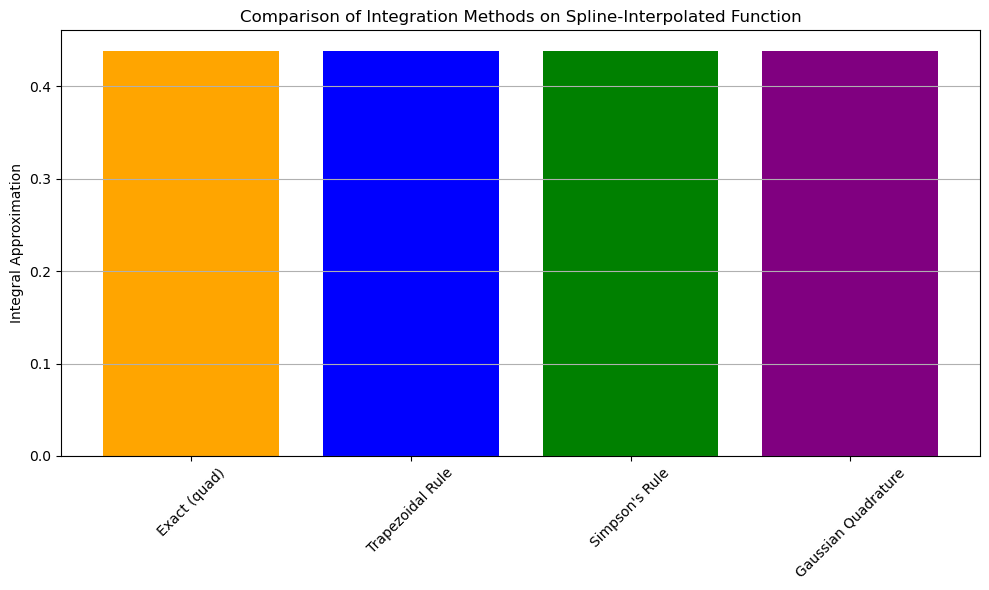

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.integrate import trapezoid, simps, quad

# Define the function
def arctan_func(x):
    return np.arctan(x)

# Integration bounds
a, b = 0, 1

# Generate unevenly spaced data points
x_uneven = np.array([0, 0.1, 0.4, 0.7, 1.0])
y_uneven = arctan_func(x_uneven)

# Spline interpolation
spline_func = CubicSpline(x_uneven, y_uneven)
x_spline = np.linspace(a, b, 1000)
y_spline = spline_func(x_spline)

# Original function for reference
x_dense = np.linspace(a, b, 1000)
y_dense = arctan_func(x_dense)

# Integration using numerical methods
# Exact integral
exact_integral, _ = quad(arctan_func, a, b)

# Numerical methods on spline-interpolated function
spline_trapz = trapezoid(y_spline, x_spline)
spline_simpson = simps(y_spline, x_spline)

# Gaussian Quadrature (2-point)
gauss_points = np.array([-1/np.sqrt(3), 1/np.sqrt(3)])
gauss_weights = np.array([1, 1])
gauss_x_spline = (b - a) / 2 * gauss_points + (b + a) / 2
gauss_spline_result = (b - a) / 2 * np.sum(gauss_weights * spline_func(gauss_x_spline))

# Results
methods = ["Exact (quad)", "Trapezoidal Rule", "Simpson's Rule", "Gaussian Quadrature"]
approximations = [exact_integral, spline_trapz, spline_simpson, gauss_spline_result]

# Plot the original uneven data points and spline interpolation
plt.figure(figsize=(12, 6))
plt.scatter(x_uneven, y_uneven, color='red', label='Uneven Data Points', zorder=5)
plt.plot(x_spline, y_spline, color='blue', label='Spline Interpolation')
plt.plot(x_dense, y_dense, color='green', linestyle='--', label='Original Function')
plt.title("Spline Interpolation of Uneven Data Points")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar chart comparing the integration methods
plt.figure(figsize=(10, 6))
plt.bar(methods, approximations, color=['orange', 'blue', 'green', 'purple'])
plt.title("Comparison of Integration Methods on Spline-Interpolated Function")
plt.ylabel("Integral Approximation")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()